**negrito** Trabalho 1 da segunda sprint.

 Aluno: Miguel Costa Góes

 Neste trabalho será utlilizado uma dataset com parametros de operação de ferramentas de usinagem e a vida útil da ferramenta. Esse dataset foi retirado do site kaggle, podendo ser acessado pelo link:

  https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification

 Esse dataset possui 10000 linhas e 10 colunas, sendo as colunas:

 UDI   -  Identificação da máquina operatriz
 Product ID  - ID de identificação do equipamento;

 Type  - Porte do equipamento (pequeno, médio ou grande);

 Air temperature [K] -  Temperatura do ar onde a máquina se encontra;

 Process temperature [K]  - Temperatura do processo de usinagem;

Rotational speed [rpm]  - Velocidade de operação do eixo da máquina;

Torque [Nm]  - Torque demandado no eixo da máquina durante o processo de usinagem;

Tool wear [min]  - Tempo de desgaste da ferramenta;

Target - Indicação binária de falha;

Failure Type   - Indicação de falha:
         
 A ideia principal é prever se para determinada situação de trabalho a ferramenta irá falhar ou não.

 Importação das bibliotecas utulizadas no projeto:

In [ ]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.feature_selection import SelectKBest # Seleçao univariada
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split # Separação dos dados em teste e treinamento
from sklearn.model_selection import KFold # Para executar a separação para teste cruzado
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler

 Importação do arquivo em formato .csv, este arquivo foi carregado no drive para facilitar trabalho e verificação.

In [ ]:
# importação dos dados utilizando que estão carregados no drive
try:
    nomes_atributos =(['UDI','Product ID','Type','Air temperature','Process temperature',
                       'Rotational speed','Torque','Tool wear','Target','Failure Type'])

    dados=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sprint2/Ferramenta/predictive_maintenance.csv')
    type (dados)
    print('Dados carregados com sucesso')
except:
    print('Erro ao carregar dados, verifique o formato e local do arquivo')

Dados carregados com sucesso


 Imprimir algumas linhas do dataset para verificar se os dados foram carregados de maneira correta e verificar também a quantidade total de linhas e colunas.

In [ ]:
# Verificação do dados

print(dados.head(5))
print('\n')
print(100*'-')
quant = dados.count()

colunas = dados.columns
i=0
print('Número da coluna     Nome da coluna              Quantidade     Tipo da variável dessa coluna\n')
for nomes in colunas:
  print('{:<20} {:<28} {:<13} {}'. format(i+1, colunas[i], quant[i], type(dados.dtypes[i])))
  i=i+1

TestFailure = 0
TestMHL = 0

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  


-------------------------------------------------------------------------------------------

 Verificação de dados faltantes do dataset escolhido

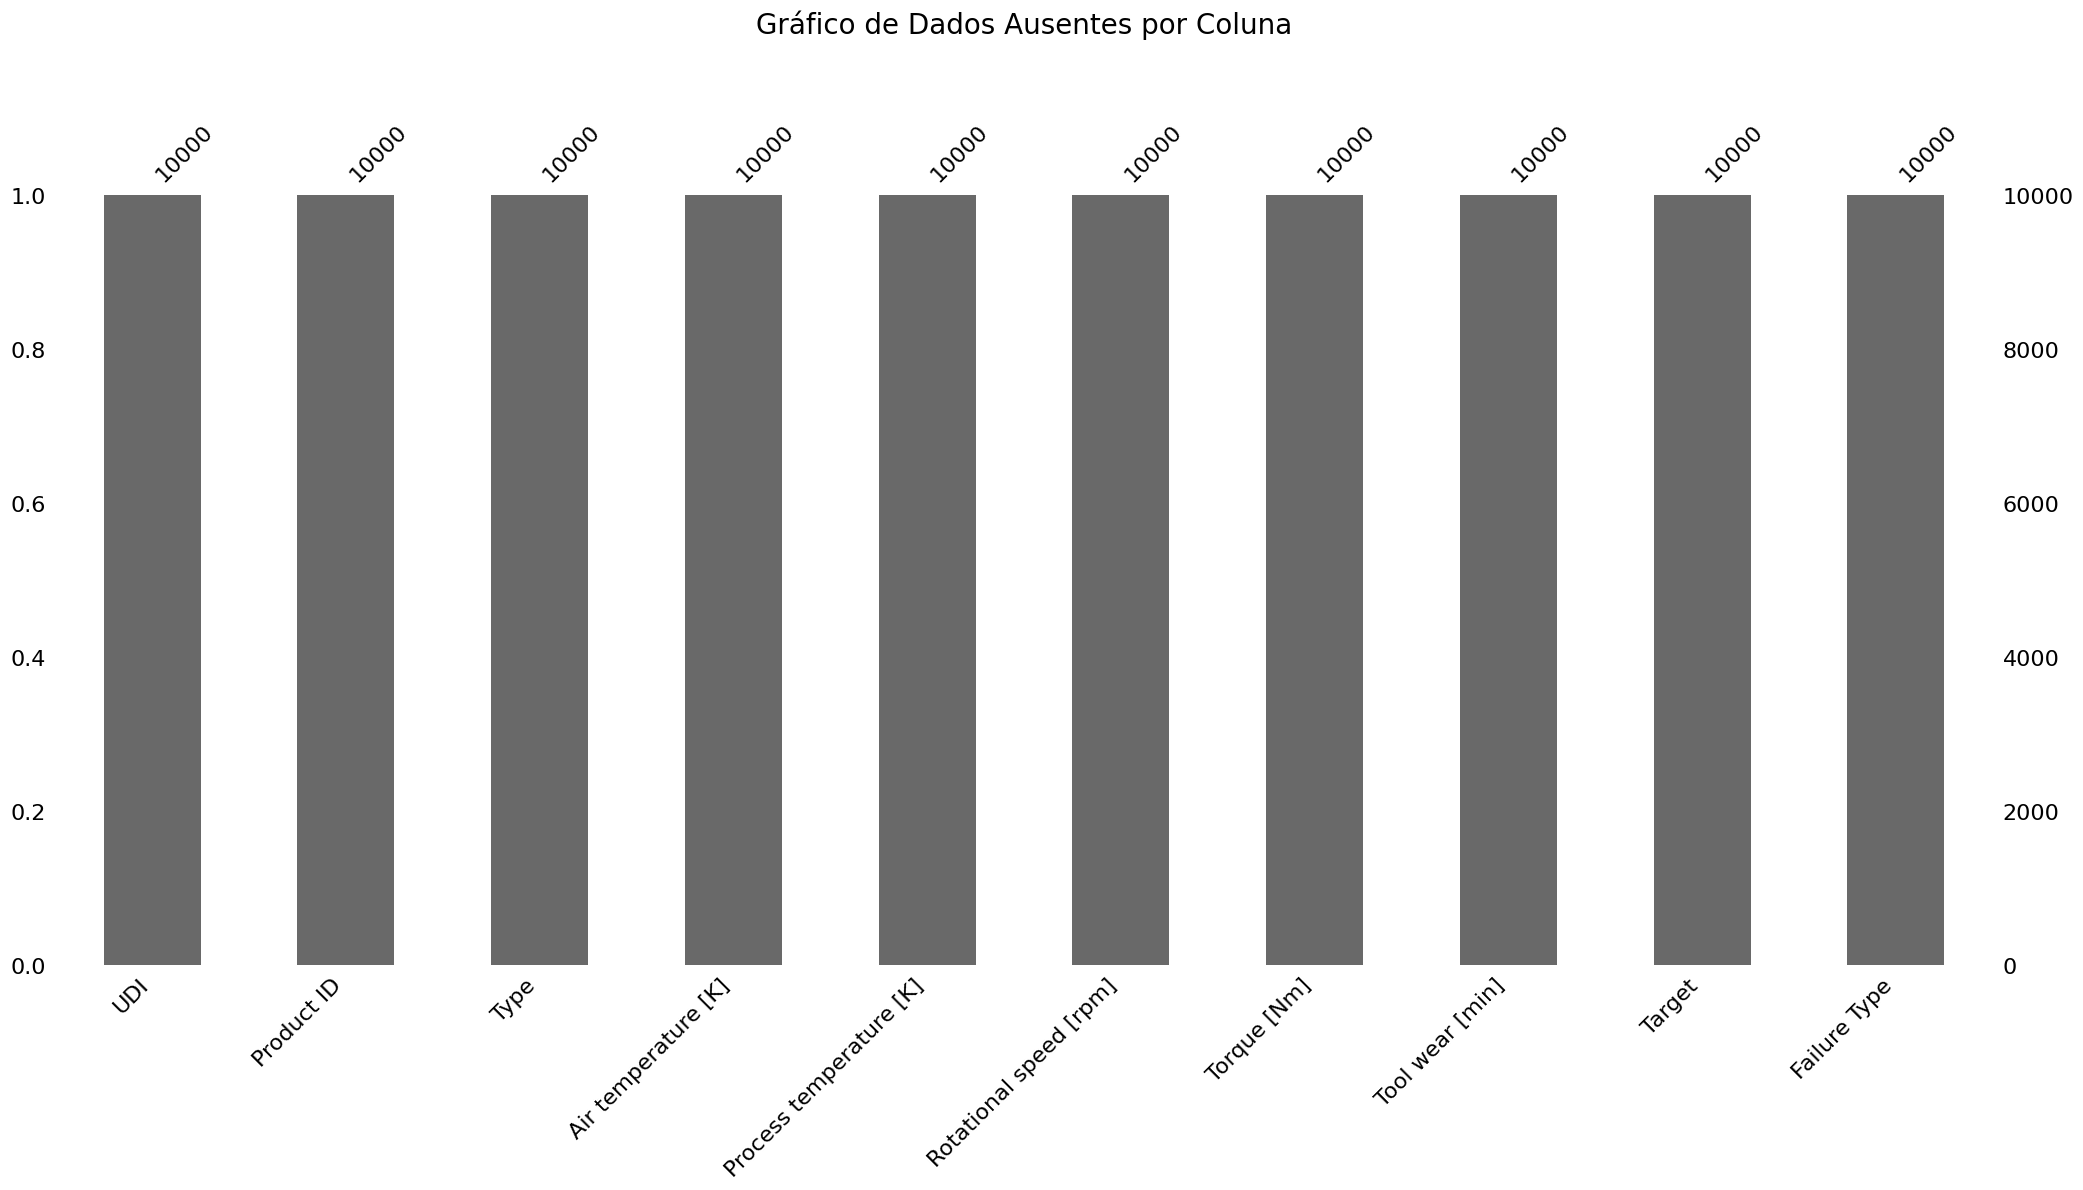

In [ ]:
# Verificação a existencia de algum dado faltante no dataset
msno.bar(dados);
titulo = "Gráfico de Dados Ausentes por Coluna"
plt.title(titulo, fontsize=20, y =1.2)
plt.show()

 Realizar a mudança de nome No Falilure e o nome Failure para 0 e 1 respectivamente, tornando possível trabalhar com essas informações no programa.

In [ ]:
# Mudar a nomeclatura de "NO Failure" e "Failure" para
# 0 e 1 respectivamente
if TestFailure == 0:
    array = dados.values
    i=0
    NL= 0 # contagem de ferrmentas que não falharam
    NM = 0 # contagem de ferrmentas que falharam
    for i in range(quant[1]):
        if array[i, 9] == 'No Failure':
           array[i, 9] =0
           NL=NL+1
        else:
           array[i, 9] = 1
           NM=NM+1

    print('Quantidade de ferramentas que não falharam : {} '.format (NM))
    print('Quantidade de ferramentas que falharam : {} \n '.format (NL))

    # impressão do alguns dados para verificar as alterações

    i=0
    while i<10:
        print(array[i])
        i=i+1
    TestFailure = 1 # fazendo alteração da varialve de verificação.
else:
  print('O valores já foram classificados:')

Quantidade de ferramentas que não falharam : 348 
Quantidade de ferramentas que falharam : 9652 
 
[1 'M14860' 'M' 298.1 308.6 1551 42.8 0 0 0]
[2 'L47181' 'L' 298.2 308.7 1408 46.3 3 0 0]
[3 'L47182' 'L' 298.1 308.5 1498 49.4 5 0 0]
[4 'L47183' 'L' 298.2 308.6 1433 39.5 7 0 0]
[5 'L47184' 'L' 298.2 308.7 1408 40.0 9 0 0]
[6 'M14865' 'M' 298.1 308.6 1425 41.9 11 0 0]
[7 'L47186' 'L' 298.1 308.6 1558 42.4 14 0 0]
[8 'L47187' 'L' 298.1 308.6 1527 40.2 16 0 0]
[9 'M14868' 'M' 298.3 308.7 1667 28.6 18 0 0]
[10 'M14869' 'M' 298.5 309.0 1741 28.0 21 0 0]


Realizar a mudança de nome No "L", "M" e "H"  0, 1 e 2 respectivamente, tornando possível trabalhar com essas informações no programa.

In [ ]:
if TestMHL == 0:
    # Mudar a nomeclatura "L","M" e "H"
    # para "0","1 e "2" respectivamente
    i=0
    while i< 5: # impressão para comparar saída antes e depois
        print(array[i])
        i=i+1
    #print(array[0, 2])
    print(50*'-')
    i=0
    NL = 0 # Número de dados classificados como L
    NM = 0 # Número de dados classificados como M
    NH = 0 # Número de dados classificados como H
    #print(quant[1])
    for i in range(quant[1]):
        if array[i, 2] == 'L':
           array[i, 2] = 0
           NL=NL+1
        elif array[i, 2] == 'M':
           array[i, 2] = 1
           NM=NM+1
        else:
           array[i, 2] = 2
           NH=NH+1
    print('Quantidade de ferramentas classificadas como "L" : {} '.format (NL))
    print('Quantidade de ferramentas classificadas como "M" : {} '.format (NM))
    print('Quantidade de ferramentas classificadas como "H" : {} '.format (NH))
    print(50*'-')
    i=0
    while i< 5:
        print(array[i])
        i=i+1
    TestMHL = 1 # fazendoo da varialvel de verificação.
else :
  print("Os valores de L, M e H já foram atualizados e são:")
  print('Quantidade de ferramentas classificadas como "L" : {} '.format (NL))
  print('Quantidade de ferramentas classificadas como "M" : {} '.format (NM))
  print('Quantidade de ferramentas classificadas como "H" : {} '.format (NH))

[1 'M14860' 'M' 298.1 308.6 1551 42.8 0 0 0]
[2 'L47181' 'L' 298.2 308.7 1408 46.3 3 0 0]
[3 'L47182' 'L' 298.1 308.5 1498 49.4 5 0 0]
[4 'L47183' 'L' 298.2 308.6 1433 39.5 7 0 0]
[5 'L47184' 'L' 298.2 308.7 1408 40.0 9 0 0]
--------------------------------------------------
Quantidade de ferramentas classificadas como "L" : 6000 
Quantidade de ferramentas classificadas como "M" : 2997 
Quantidade de ferramentas classificadas como "H" : 1003 
--------------------------------------------------
[1 'M14860' 1 298.1 308.6 1551 42.8 0 0 0]
[2 'L47181' 0 298.2 308.7 1408 46.3 3 0 0]
[3 'L47182' 0 298.1 308.5 1498 49.4 5 0 0]
[4 'L47183' 0 298.2 308.6 1433 39.5 7 0 0]
[5 'L47184' 0 298.2 308.7 1408 40.0 9 0 0]


 Separação dos atributos em classes que que serão utilizadas para prever o comportamento e na classe de saída.

In [ ]:
# Separanção dos atributos do item e na classe
x = array[:,2:8]
y = array[:,8]
y=y.astype('int')
print(y[0]) # impressão para verificação do valor
print(type(y[0])) # impressão para verificação do tipo da variável

# valores que a classificação pode assumir
# neste caso o valor 0 para ferramentas que não falharam e o valor
# 1 para as que falharam.

0
<class 'numpy.int64'>


Verificação do formando dos dados.

In [ ]:
from numpy.core.fromnumeric import shape
print(x.shape)
print(y.shape)

(10000, 6)
(10000,)


Avliação de quais variais são mais representativas para classificar o problema.

 Como esse problema possui uma saida categorica (falha ou não falha) e as entradas númericas (rpm, temperatura, etc) o método utilizado sera a seleção univariada.

In [ ]:
# Foi realizado varios teste para escolher qual é a quantidade features são
# que melhor representam esse problema. Nesse caso expecifico foi escolhido
# 3 features.

val_escolhidas = SelectKBest(score_func=f_classif, k=3)

#fazer o fit da classe
fit = val_escolhidas.fit(x,y)

features = fit.transform(x) # features escolhidos que melhor representam o problema
print('Quantidade de atributos avaliados:\n',x.shape[1])
print('Quantidade de atributos selecionados: \n',features.shape[1])
print('Variaveis originais:\n ',dados.columns[2:8])
print('Pontuação das variaveis originais: \n ',fit.scores_)

print('variaveis escolhidas:\n',val_escolhidas.get_feature_names_out(input_features=dados.columns[2:8]))

Quantidade de atributos avaliados:
 6
Quantidade de atributos selecionados: 
 3
Variaveis originais:
  Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')
Pontuação das variaveis originais: 
  [ 13.49549752  68.60838474  12.93525964  19.55969036 379.86772342
 112.42107678]
variaveis escolhidas:
 ['Air temperature [K]' 'Torque [Nm]' 'Tool wear [min]']


 Separação dos dados em dados de treino e dados de teste.

In [ ]:
# Realizar a separação dos dados das features escolhidas na etapa anteriior
# em dados de teste e dados de treinamento.

x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.20, random_state=1)

# imprimir a quantidade de dados para cada grupo.
print('formato dos dados de treinamento x: {}'.format(x_train.shape))
print('formato dos dados de treinamento y: {}'.format(y_train.shape))
print('formato dos dados de teste x: {}'.format(x_test.shape))
print('formato dos dados de teste y: {}'.format(y_test.shape))


formato dos dados de treinamento x: (8000, 3)
formato dos dados de treinamento y: (8000,)
formato dos dados de teste x: (2000, 3)
formato dos dados de teste y: (2000,)


Criando parâmetros para a realização da validação cruzada, nesse casso serão utilizadas 10 partes para validação.

In [ ]:
# Fazendo a separação dos dados para validaçao cruzada.
num_part = 10
Kfold = KFold(n_splits = num_part, shuffle=True, random_state=5)

 Criando os modelos que serão utilizados durantes os testes.

In [ ]:
from pandas.core.algorithms import mode
# Preparando os modelos e adicionando-os em uma lista
models = []
results = []
names = []
bases = []

models.append(('KNN', KNeighborsClassifier(n_neighbors=3,weights='uniform',algorithm='auto',p=2)))
bases.append(('KNN', KNeighborsClassifier(n_neighbors=3,weights='uniform',algorithm='auto',p=2)))
models.append(('CART', DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=None)))
bases.append(('CART', DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=None)))
models.append(('NB', GaussianNB()))
bases.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
bases.append(('SVM', SVC()))
models.append(('voting',VotingClassifier(bases)))

Testando algumas saídas para verificação de conformidade de formato de dados.

In [ ]:
# Impressão dos dados para verificação da conformidade dos dados
print('primeira linha do teste {}:'.format(x_train[0]))
print('tipo dos dados do treino  {}'.format(type(x_train[0])))
print('primeira saida de treino {}'.format(y_train[0]))
print('tipo dado da saida do treino  {}'.format(type(y_train[0])))

primeira linha do teste [300.1 38.0 46]:
tipo dos dados do treino  <class 'numpy.ndarray'>
primeira saida de treino 0
tipo dado da saida do treino  <class 'numpy.int64'>


In [ ]:
# verificando a precisão dos modelos
for name, model in models:
    cv_results = cross_val_score(model, x_train, y_train, cv=Kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
    print(msg)

KNN: 0.968500 (0.004835)
CART: 0.958750 (0.004841)
NB: 0.967750 (0.006144)
SVM: 0.965500 (0.005596)
voting: 0.967500 (0.006124)


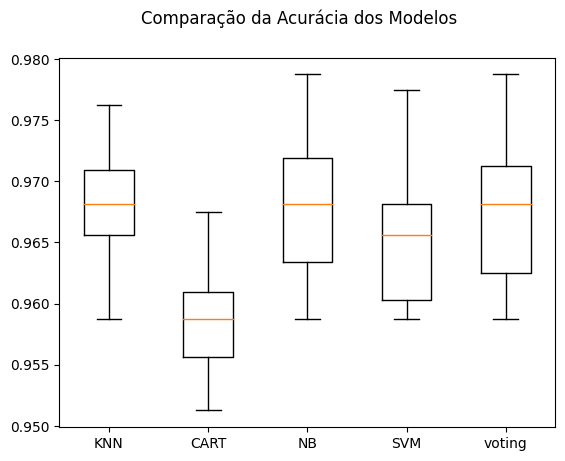


 Média dos modelos durante a validação cruzada 

 Modelo ('KNN', KNeighborsClassifier(n_neighbors=3)) 
[0.975   0.97    0.965   0.95875 0.9675  0.965   0.9675  0.96875 0.97625
 0.97125] 
 
 Modelo ('CART', DecisionTreeClassifier()) 
[0.95875 0.95875 0.96    0.95125 0.9525  0.955   0.9675  0.96125 0.9575
 0.965  ] 
 
 Modelo ('NB', GaussianNB()) 
[0.97875 0.97375 0.9625  0.95875 0.95875 0.96625 0.97    0.96875 0.9725
 0.9675 ] 
 
 Modelo ('SVM', SVC()) 
[0.9775  0.96875 0.95875 0.95875 0.95875 0.965   0.97    0.965   0.96625
 0.96625] 
 
 Modelo ('voting', VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=3)),
                             ('CART', DecisionTreeClassifier()),
                             ('NB', GaussianNB()), ('SVM', SVC())])) 
[0.97875 0.9725  0.96125 0.95875 0.95875 0.96625 0.97125 0.96875 0.97125
 0.9675 ] 
 


In [ ]:
# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# verificando os dados utilizando para a traçar média e desvio padrão
print('\n Média dos modelos durante a validação cruzada \n')
i = 0
for i in range(len(results)):
    print(' Modelo {} '.format(models[i]))
    print('{} \n '.format((results[i])))

 Verificando o desepenho de cada modelo para cada conunjunto de validaçao cruzada.
  Nesse caso é possível perceber que os modelos NB e Voting tiveram um desempenho muito parecido, sendo o NB um pouco mais preciso e o voting com menor desvio padrão.
   Devido a esse comportamento será utilizado o Voting na base de teste.

Agora iremos verifica o desempenho com modelo escolhido para o teste.

In [ ]:
scaler = StandardScaler().fit(x_train)
rescaledx =scaler.transform(x_train)
model = VotingClassifier(bases)
model.fit(rescaledx, y_train)

rescaled_x_test = scaler.transform(x_test)
predictions = model.predict(rescaled_x_test)
acu=float(accuracy_score(y_test, predictions))
print('A acuracia do modelo escolhido utilizando os dados de teste foi {}% :'.format(acu*100))


<class 'float'>
A acuracia do modelo escolhido utilizando os dados de teste foi 97.3% :



O resultado final temos que o modelo conseguiu acertar 97.3 % das pevisões, isso demostra que:

1.   O modelo está bem ajustado para predizer se a ferramenta irá quebrar ou não.
2.   As features escolhidas representam bem o problema.
3.   A coleta de dados foi realizada de forma muito boa e os dados estão representando bem o problema.





